## Limpieando datos
https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos de entrenamiento y prueba
train = pd.read_csv("./assets/titanic/train.csv")


In [2]:
train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# imprimir el porcentaje de datos faltantes de cada columna
print((train.isnull().sum()/train.shape[0])*100)
print('*'*50)


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
**************************************************


In [4]:
train.shape[0]

891

In [5]:
train.drop("Cabin", axis=1, inplace=True) # el 77% de los datos de la columna "Cabin" son faltantes eliminars

# Imputar "Age" con la mediana
age_median = train["Age"].median()
train["Age"] = train["Age"].fillna(age_median)

#Imputar "Embarked" con la moda en el dataset de entrenamiento
embarked_mode = train["Embarked"].mode()[0]
print(embarked_mode)
train['Embarked']=train["Embarked"].fillna(embarked_mode)

S


In [6]:
#eliminar datos irrelevantes
train.drop(["PassengerId", "Ticket"], axis=1, inplace=True)

In [7]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [8]:
train = pd.get_dummies(train, columns=["Sex", "Embarked"], drop_first=True)
# Acabamos de convertir las variables categóricas en variables dummy 
# y eliminamos la primera columna de cada variable categórica para evitar la multicolinealidad.
# sex tomara el valor 1 si es hombre y 0 si es mujer
# embarked tomará el valor 1 si embarco en la ciudad de Queenstown y 0 si no

train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,False,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,False,True
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True,False,True


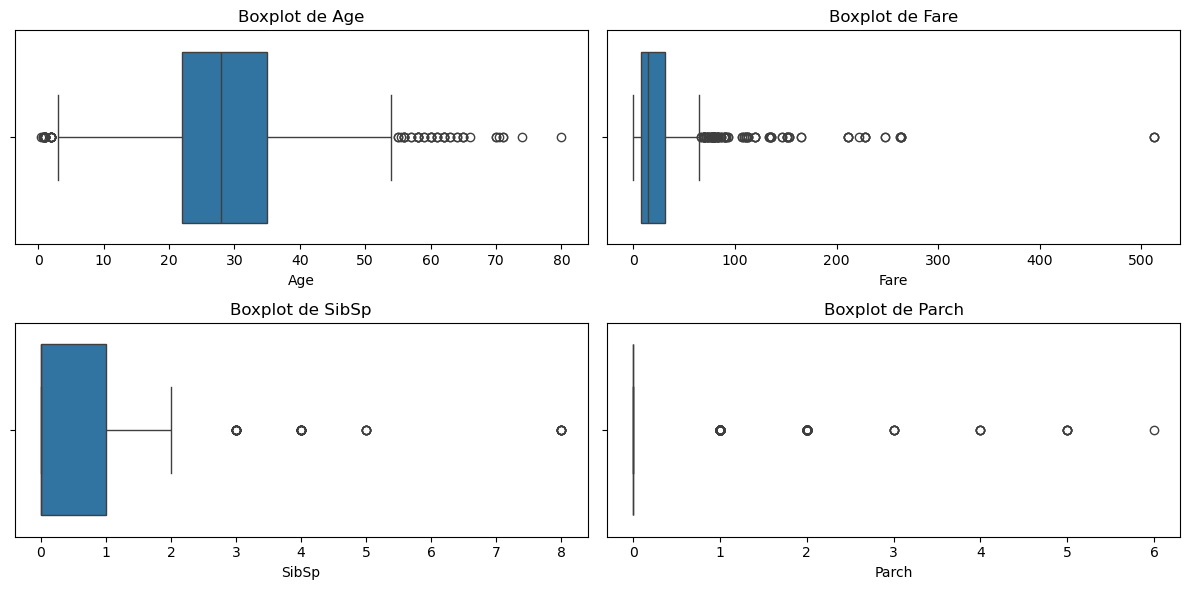

In [9]:
#busquemos outliers para arreglarlos de ser necesario


# Lista de variables numéricas
numeric_vars = ["Age", "Fare", "SibSp", "Parch"]

# Boxplots para cada variable
plt.figure(figsize=(12, 6))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train[var])
    plt.title(f"Boxplot de {var}")
plt.tight_layout()
plt.show()

# manejando outliners 
## Transformación Logarítmica en Fare

¿Por qué se usa?
Problema: La variable Fare (tarifa) tiene una distribución altamente sesgada a la derecha debido a unos pocos pasajeros que pagaron tarifas exorbitantes (outliers).

Ejemplo: Algunos pasajeros de primera clase pagaron hasta £512 

Consecuencia: Este sesgo infla artificialmente medidas como la media y distorsiona análisis estadísticos (correlaciones, regresiones).

## Limitar SibSp a un máximo de 3

¿Por qué se usa?
Problema: SibSp (número de hermanos/cónyuges a bordo) es una variable discreta con valores atípicos altos (ej.: 8 hermanos).

Solo el 1.3% de los pasajeros tenía más de 3.

Consecuencia: Estos valores raros pueden sesgar análisis como la correlación con la supervivencia.

Solución:
Agrupar valores > 3 en la categoría 3:

Reducir ruido: Trata a todos los pasajeros con ≥ 4 hermanos como un solo grupo ("familia grande").

Mantener significado: Preserva la información de que tenían una familia numerosa, pero evita que valores extremos dominen el análisis.

Ejemplo Práctico:
Un pasajero con SibSp = 8 se recodifica como SibSp_clean = 3.

Esto no elimina su registro, solo lo agrupa con otros pasajeros de familias grandes.

## Limitar Parch a un máximo de 2
¿Por qué se usa?
Problema: Parch (número de padres/hijos a bordo) también tiene valores atípicos altos (ej.: 6 hijos).

Solo el 2.2% de los pasajeros tenía más de 2.

Consecuencia: Similar a SibSp, estos valores pueden distorsionar estadísticas.

Solución:
Agrupar valores > 2 en la categoría 2:

Simplificar análisis: Trata a todos los pasajeros con ≥ 3 padres/hijos como "familias muy grandes".


Ejemplo Práctico:
Un pasajero con Parch = 6 se recodifica como Parch_clean = 2.

## Edad - age
No le hicimos nada aparte de llenar los datos faltantes con la mediana, ya que los outliners de esto solo indican que hay gente muy mayor y es un dato acertado


In [10]:
train["Fare_log"] = np.log1p(train["Fare"])
# Limitar SibSp a máximo 3
train["SibSp_clean"] = np.where(train["SibSp"] > 3, 3, train["SibSp"])

# Limitar Parch a máximo 2
train["Parch_clean"] = np.where(train["Parch"] > 2, 2, train["Parch"])


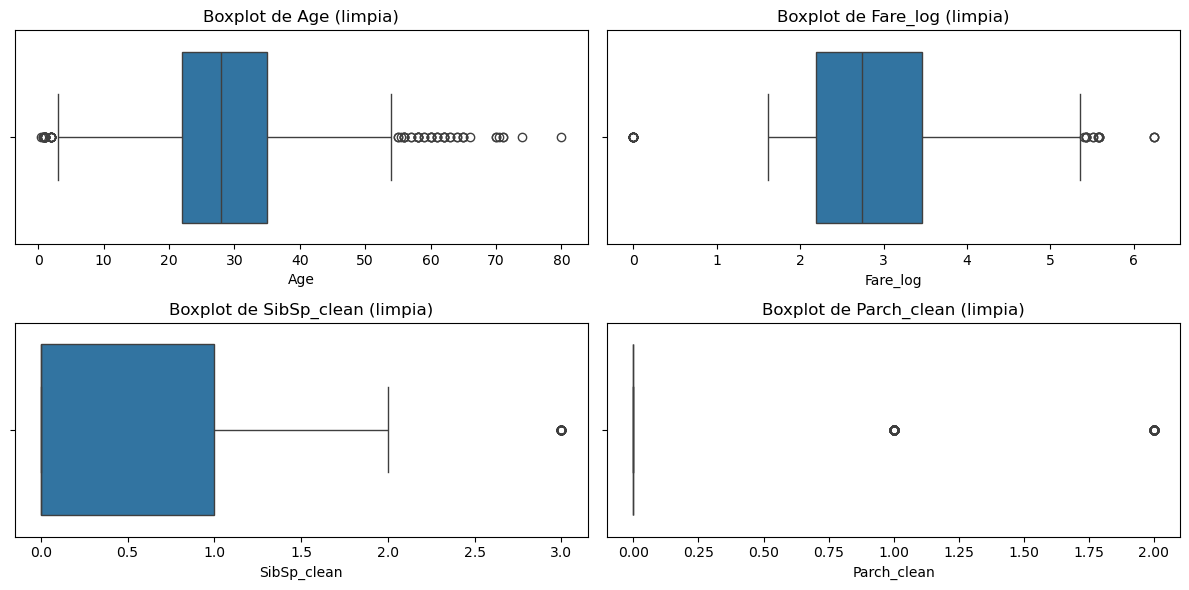

In [11]:
# Boxplots de variables limpias
cleaned_vars = ["Age", "Fare_log", "SibSp_clean", "Parch_clean"]

plt.figure(figsize=(12, 6))
for i, var in enumerate(cleaned_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train[var])
    plt.title(f"Boxplot de {var} (limpia)")
plt.tight_layout()
plt.show()

# Ingenieria de variables
agregando variables relevantes
Aquí tienes la explicación estructurada en formato Markdown para documentar las transformaciones:

---

### **Ingeniería de Variables en el Dataset del Titanic**

#### **1. `FamilySize` (Tamaño de la Familia)**

- **Propósito**:  
  Combina el número de hermanos/cónyuges (`SibSp`) y padres/hijos (`Parch`) en una sola variable.  
- **Justificación**:  
  Permite analizar cómo el tamaño del grupo familiar afectó la supervivencia. Familias grandes podrían haber tenido más dificultad para evacuar juntas.

---

#### **2. `IsAlone` (Viaja Solo)**

- **Propósito**:  
  Identifica pasajeros que viajaban sin familiares.  
- **Justificación**:  
  Los pasajeros solos podrían haber tenido menos apoyo para acceder a los botes salvavidas, lo que podría correlacionarse con menor supervivencia.

---

#### **3. `Title` (Título del Pasajero)**


- **Propósito**:  
  Extrae el título social (Mr, Mrs, Miss, Master, etc.) del nombre del pasajero.  
- **Justificación**:  
  - Los títulos reflejan género, estatus socioeconómico y edad (ej.: "Master" = niño varón).  
  - Agrupar títulos raros en una categoría única ("Rare") simplifica el análisis de grupos minoritarios.

---

#### **4. `AgeGroup` (Grupo de Edad)**

- **Propósito**:  
  Segmenta la edad en categorías interpretables.  
- **Justificación**:  
  - Facilita el análisis de patrones de supervivencia por grupo etario.  
  - Los niños ("Niño") podrían haber tenido prioridad en los botes, según normas de evacuación históricas.

---

- **Propósito**:  
  Divide la tarifa pagada en cuartiles para crear categorías ordinales.  
- **Justificación**:  
  - La tarifa está directamente ligada a la clase social (`Pclass`).  
  - Permite explorar si los pasajeros que pagaron tarifas más altas tuvieron mayor acceso a recursos de supervivencia.

---


---

### **Impacto en el Análisis**  
Estas transformaciones permiten:  
✅ Identificar patrones ocultos (ej.: supervivencia de niños vs. adultos).  
✅ Simplificar variables complejas (ej.: nombres → títulos sociales).  
✅ Mejorar la interpretabilidad en gráficos y modelos estadísticos.  

--- 



In [12]:
train["FamilySize"] = train["SibSp"] + train["Parch"]
train["IsAlone"] = np.where(train["FamilySize"] == 0, 1, 0) # 1 si está solo, 0 si no{}

train["Title"] = train["Name"].str.extract(r' ([A-Za-z]+)\.', expand=False)
train["Title"] = train["Title"].replace(["Lady", "Countess", "Dr", "Rev", "Col", "Major", "Sir", "Jonkheer"], "Rare")
train["Title"] = train["Title"].replace("Mlle", "Miss")
train["Title"] = train["Title"].replace("Ms", "Miss")
train["Title"] = train["Title"].replace("Mme", "Mrs")
bins = [0, 12, 18, 35, 60, 100]
labels = ["Niño", "Adolescente", "Adulto Joven", "Adulto", "Adulto Mayor"]
train["AgeGroup"] = pd.cut(train["Age"], bins=bins, labels=labels)
#el cut de edad se hace en 5 grupos, niño, adolescente, adulto joven, adulto y adulto mayor
train["FareCategory"] = pd.qcut(train["Fare"], 4, labels=["Baja", "Media", "Alta", "Muy Alta"])
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Fare_log,SibSp_clean,Parch_clean,FamilySize,IsAlone,Title,AgeGroup,FareCategory
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True,False,True,2.110213,1,0,1,0,Mr,Adulto Joven,Baja
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,False,False,4.280593,1,0,1,0,Mrs,Adulto,Muy Alta
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,False,True,2.188856,0,0,0,1,Miss,Adulto Joven,Media
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,False,True,3.990834,1,0,1,0,Mrs,Adulto Joven,Muy Alta
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True,False,True,2.202765,0,0,0,1,Mr,Adulto Joven,Media


## True equivale a 1
## False equivale a 0

---

### **Resumen de Variables Transformadas/Creadas**  
#### **Variables Originales**  
| Variable    | Descripción                                 |  
|-------------|---------------------------------------------|  
| Survived    | 0 = No sobrevivió, 1 = Sobrevivió           |  
| Pclass      | 1 = 1ª clase, 2 = 2ª clase, 3 = 3ª clase    |  
| Age         | Edad en años (imputada con mediana)         |  
| SibSp       | N° de hermanos/cónyuges a bordo             |  
| Parch       | N° de padres/hijos a bordo                  |  
| Fare        | Tarifa del boleto (transformada a log)      |  

---

#### **Variables de Ingeniería**  
| Variable       | Descripción                                                                 | **Codificación/Valores**                                                                 |  
|----------------|-----------------------------------------------------------------------------|------------------------------------------------------------------------------------------|  
| **Sex_male**   | Género del pasajero (codificado).                                           | 0 = Mujer (`female`), 1 = Hombre (`male`).                                               |  
| **Embarked_Q** | Puerto de embarque: Queenstown (codificado).                                | 0 = No embarcó en Queenstown, 1 = Sí embarcó.                                            |  
| **Embarked_S** | Puerto de embarque: Southampton (codificado).                               | 0 = No embarcó en Southampton, 1 = Sí embarcó.                                           |  
| **Embarked_C** | *Nota*: Cherbourg es la categoría de referencia cuando `Embarked_Q` y `Embarked_S` son 0. | Si ambas son 0 → Pasajero embarcó en **Cherbourg**.                                      |  
| **FamilySize** | Tamaño del grupo familiar.                                                  | Suma de `SibSp + Parch` (ej: 0 = viaja solo, 3 = viaja con 3 familiares).                |  
| **IsAlone**    | Indica si el pasajero viajaba solo.                                         | 0 = Viajaba con familia, 1 = Viajaba solo.                                               |  
| **Title**      | Título social extraído del nombre.                                          | Valores: `Mr`, `Mrs`, `Miss`, `Master`, `Rare` (títulos nobles/profesionales consolidados). |  
| **AgeGroup**   | Grupo etario del pasajero.                                                  | Categorías: `Niño` (0-12), `Adolescente` (13-18), `Adulto Joven` (19-35), `Adulto` (36-60), `Adulto Mayor` (>60). |  
| **FareCategory**| Categoría de tarifa basada en cuartiles.                                    | `Baja`, `Media`, `Alta`, `Muy Alta`.                                                     |  

---

### **Ejemplo de Dataset Transformado**  
| Survived | Pclass | Sex_male | AgeGroup     | FareCategory | Embarked_Q | Embarked_S | Title | IsAlone |  
|----------|--------|----------|--------------|--------------|------------|------------|-------|---------|  
| 1        | 1      | 0        | Adulto       | Alta         | 0          | 1          | Mrs   | 0       |  
| 0        | 3      | 1        | Adulto Joven | Baja         | 0          | 0          | Mr    | 1       |  

---



# **1. Análisis Exploratorio por Grupos**



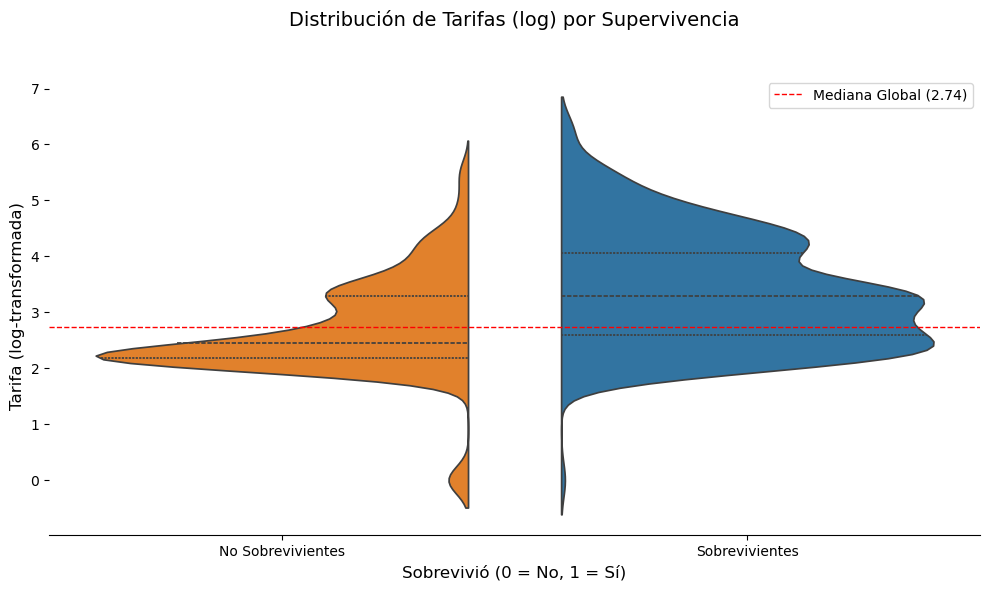

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(
    x="Survived", 
    y="Fare_log", 
    hue="Survived",  # Asignamos la variable a "hue"
    data=train, 
    split=True, 
    inner="quartile",
    palette={0: "#ff7f0e", 1: "#1f77b4"},  # Colores para 0 y 1
    legend=False  # Ocultamos la leyenda redundante
)

# Añadir línea de mediana global
median_fare = train["Fare_log"].median()
plt.axhline(median_fare, color="red", linestyle="--", linewidth=1, label=f"Mediana Global ({median_fare:.2f})")

# Personalización avanzada
plt.title("Distribución de Tarifas (log) por Supervivencia\n", fontsize=14, pad=20)
plt.xlabel("Sobrevivió (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Tarifa (log-transformada)", fontsize=12)
plt.xticks([0, 1], ["No Sobrevivientes", "Sobrevivientes"])  # Etiquetas más descriptivas
plt.legend(loc="upper right", frameon=True)
sns.despine(left=True)  # Estilo más limpio
plt.tight_layout()
plt.show()

## Interpretación del Gráfico: Distribución de Tarifa (log) por Supervivencia

Este gráfico compara la **distribución de la tarifa (en escala logarítmica)** entre quienes **no sobrevivieron** (0) y quienes **sobrevivieron** (1). A grandes rasgos:

1. **Distribución para No Sobrevivientes (0):**
   - Se concentra más en valores **bajos** de la tarifa (log-transformada), lo que indica que muchos pasajeros que pagaron tarifas más económicas no lograron sobrevivir.
   - Hay un rango más amplio hacia la izquierda, mostrando que algunos pasajeros también pagaron tarifas medias y altas, pero son menos frecuentes.

2. **Distribución para Sobrevivientes (1):**
   - Tiende a desplazarse hacia valores de tarifa **más altos** (aunque sigue habiendo pasajeros que pagaron poco y sobrevivieron).
   - La mediana y los cuartiles (si esas líneas punteadas representan cuartiles) se ubican en un rango mayor que la del grupo de no sobrevivientes, sugiriendo que, en promedio, quienes pagaron más tenían mayor probabilidad de sobrevivir.

3. **Por qué se usa la transformación logarítmica:**
   - Las tarifas del Titanic son muy **variables** y pueden tener valores extremos (outliers).
   - Al tomar logaritmo, se reduce la **dispersión** y se visualiza mejor la distribución.

**En resumen**, el gráfico evidencia que **pagar una tarifa más alta** (asociada a clases superiores) se relaciona con **mayor probabilidad de supervivencia**, aunque no excluye que haya casos de supervivientes que pagaron tarifas bajas o de fallecidos que pagaron tarifas altas.


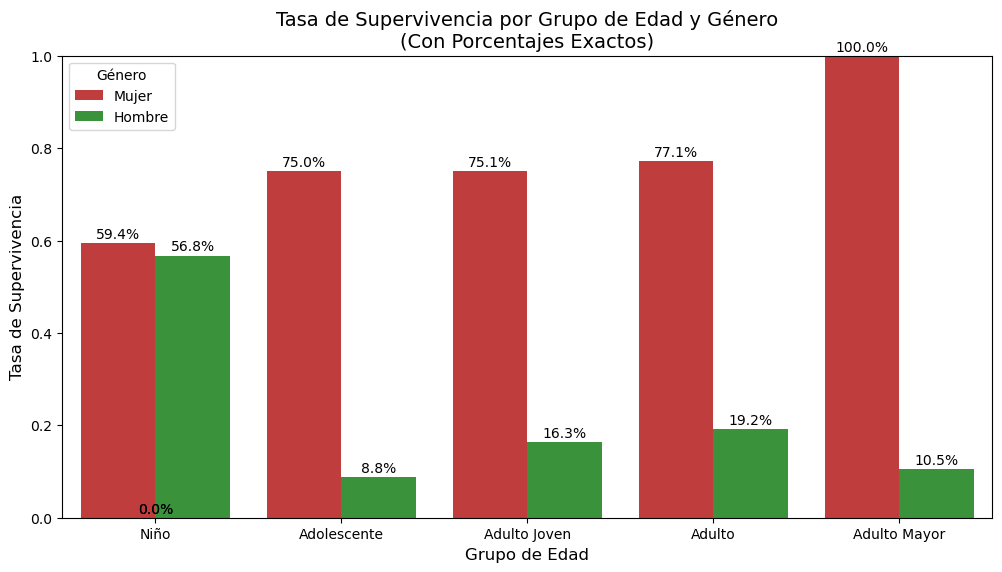

In [14]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="AgeGroup", 
    y="Survived", 
    hue="Sex_male", 
    data=train, 
    errorbar=None, 
    palette={1: "#2ca02c", 0: "#d62728"}  # Verde=Hombre, Rojo=Mujer
)

# Añadir etiquetas de porcentaje
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., 
        height + 0.01, 
        f'{height*100:.1f}%', 
        ha="center", 
        fontsize=10
    )

plt.title("Tasa de Supervivencia por Grupo de Edad y Género\n(Con Porcentajes Exactos)", fontsize=14)
plt.xlabel("Grupo de Edad", fontsize=12)
plt.ylabel("Tasa de Supervivencia", fontsize=12)
plt.legend(title="Género", labels=["Mujer", "Hombre"], loc="upper left")
plt.ylim(0, 1)
plt.show()

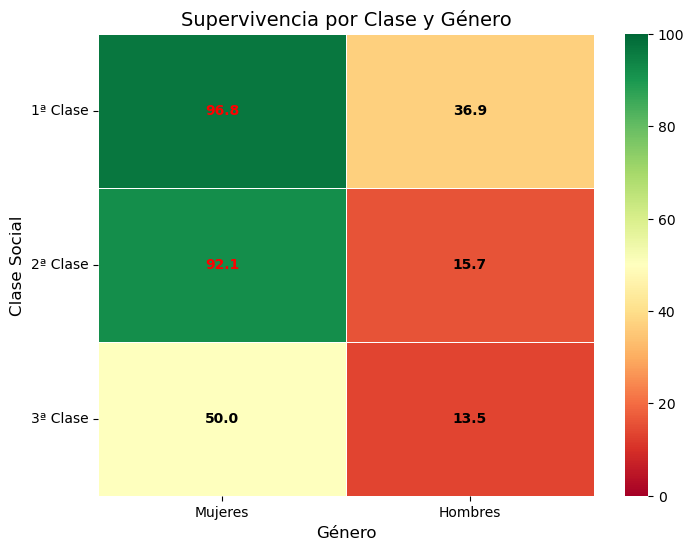

In [15]:
# Crear tabla pivote para mostrar la tasa de supervivencia por clase y género
table = train.pivot_table(
    values='Survived', 
    index='Pclass', 
    columns='Sex_male', 
    aggfunc= 'mean'
)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    table * 100, 
    annot=True, 
    fmt=".1f", 
    cmap="RdYlGn", 
    linewidths=0.5, 
    annot_kws={"weight": "bold", "color": "black"},  # Texto en negrita
    vmin=0, 
    vmax=100
)

# Resaltar celdas con supervivencia >70% en rojo
for text in ax.texts:
    val = float(text.get_text().replace("%", ""))
    if val > 70:
        text.set_color("red")

plt.title("Supervivencia por Clase y Género", fontsize=14)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Clase Social", fontsize=12)
plt.xticks([0.5, 1.5], ["Mujeres", "Hombres"])
plt.yticks([0.5, 1.5, 2.5], ["1ª Clase", "2ª Clase", "3ª Clase"], rotation=0)
plt.show()
#este grafico muestra la tasa de supervivencia por clase y género

# Análisis de Supervivencia en el Titanic: Edad, Género y Privilegio Social

## Visualización
- **Tasa de supervivencia por grupo de edad y género.**

## Hallazgos Clave

### 1. Supervivencia en Niños (0-12 años)
- **Mujeres:** ~60% de supervivencia.
- **Hombres:** ~57% de supervivencia.

#### Interpretación:
- La diferencia mínima sugiere que los niños fueron priorizados independientemente del género, posiblemente siguiendo el protocolo de "mujeres y niños primero".
- La supervivencia no alcanzó el 100% debido al caos durante el hundimiento y la disponibilidad limitada de botes.

---

### 2. Adolescentes, Adultos Jóvenes y Adultos
- **Mujeres:** ~77% de supervivencia en todos los grupos.
- **Hombres:**
  - **Adolescentes:** ~10%
  - **Adultos jóvenes:** ~16%
  - **Adultos:** ~19%

#### Interpretación:
- **Privilegio de género:** Las mujeres tuvieron acceso prioritario a los botes, reflejando las normas sociales de 1912.
- **Clase social como factor oculto:** Muchas mujeres de 1ª clase sobrevivieron, mientras que los hombres de 3ª clase (incluyendo tripulación e inmigrantes) tuvieron menos acceso a los recursos.

---

### 3. Adultos Mayores (>60 años)
- **Mujeres:** 100% de supervivencia.
- **Hombres:** ~10% de supervivencia.

#### Interpretación:
- **Cortesía hacia la edad avanzada en mujeres:** Posible priorización de mujeres mayores debido a su vulnerabilidad.
- **Sacrificio masculino:** Normas culturales de "caballerosidad" llevaron a que los hombres cedieran espacios en los botes.

---

## Razones Contextuales

### Protocolo de Evacuación
- La política oficial era **"mujeres y niños primero"**, pero su aplicación dependió de la tripulación y de la ubicación en el barco.

### Desigualdad Social
- **Pasajeros de 1ª clase** tuvieron acceso directo a botes salvavidas.
- **Pasajeros de 3ª clase** quedaron atrapados en las cubiertas inferiores.

### Caos y Desorganización
- Solo se disponían de **20 botes salvavidas**, con capacidad para **1,178 personas**, lo que representaba menos de la mitad del total de pasajeros.


---
# Explorando outliers

## Investigar a los Pasajeros con Tarifas > £300

### Objetivo Práctico
Identificar si los pasajeros que pagaron tarifas extremadamente altas tuvieron un privilegio adicional (más allá de la clase social o género) que garantizó su supervivencia.

In [16]:
# Filtrar pasajeros con tarifas mayores a £300

outliers_fare = train[train["Fare"] > 300][["Age", 'Name',"Pclass", "Fare", "Title", "Survived"]]

# outliers_fare es un DataFrame con los pasajeros que pagaron más de £300
# Podemos imprimirlo en formato Markdown para visualizarlo mejor
print(outliers_fare.to_markdown(index=False))


|   Age | Name                               |   Pclass |    Fare | Title   |   Survived |
|------:|:-----------------------------------|---------:|--------:|:--------|-----------:|
|    35 | Ward, Miss. Anna                   |        1 | 512.329 | Miss    |          1 |
|    36 | Cardeza, Mr. Thomas Drake Martinez |        1 | 512.329 | Mr      |          1 |
|    35 | Lesurer, Mr. Gustave J             |        1 | 512.329 | Mr      |          1 |


# ¿ quienes eran estos pasajeros ?
Aquí tienes una breve biografía de cada uno:

---

**Miss Annie Moore Ward**  
Fue la doncella o criada que acompañó a la familia Cardeza en el viaje inaugural del Titanic. Aunque la información sobre su vida personal es escasa, se sabe que formaba parte del séquito de la familia y estuvo a bordo en la lujosa suite (número B-51/53/55) junto a la Sra. Charlotte Cardeza, su hijo Thomas y el sirviente Gustave Lesueur. Sobrevivió al hundimiento en el bote salvavidas 3, lo que la une a la historia de uno de los grupos más acomodados a bordo del Titanic.

---

**Mr. Thomas Drake Martínez Cardeza**  
Nacido el 10 de mayo de 1875 en Germantown (Filadelfia, Pensilvania), Thomas Cardeza fue un empresario y explorador estadounidense. Proveniente de una familia prominente (su madre era Charlotte Wardle Drake, hija de un destacado banquero e industrial), viajó en el Titanic en 1912 como pasajero de primera clase, ocupando una de las suites de lujo. Acompañado de su madre, su doncella Annie Ward y su criado personal Gustave Lesueur, sobrevivió al desastre en el bote salvavidas número 3. Más tarde se estableció en la Alta Estiria, donde se destacó por sus acciones solidarias en tiempos difíciles. Falleció el 6 de junio de 1952 y descansa en West Laurel Hill Cemetery, en Bala Cynwyd (Pensilvania).

---

**Mr. Gustave J. Lesueur**  
Nacido el 26 de agosto de 1876 en Brametot, Normandía (Francia), Louis Gustave Joseph Lesueur era el sirviente personal (valet) de Thomas Cardeza. Se sabe que ya trabajaba para Cardeza desde al menos 1910. A bordo del Titanic, viajó con el grupo Cardeza y fue rescatado en el bote salvavidas 3. Tras su servicio en el barco, Lesueur sirvió en el ejército durante la Primera Guerra Mundial y, posteriormente, trabajó como intérprete y encargado de personal. Su trágico final se produjo cuando se cree que cometió suicidio por ahorcamiento alrededor del 13 de enero de 1939; fue enterrado en el cementerio de Sotteville-lès-Rouen, en Francia.

---

Estas biografías extraida de
Thomas Drake Martínez Cardeza
Fuente: https://www.encyclopedia-titanica.org/titanic-survivor/thomas-cardeza.html

Charlotte Wardle Cardeza
Fuente: https://titanicuniverse.com/passengers/charlotte-wardle-cardeza/

Louis Gustave Joseph Lesueur
Fuente: https://www.encyclopedia-titanica.org/titanic-survivor/gustave-lesueur.html

In [17]:
train.to_csv("./assets/titanic/train_cleaned.csv", index=False)
# Cargar datos de prueba
titanic = pd.read_csv("./assets/titanic/train_cleaned.csv")
titanic.head()



,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Fare_log,SibSp_clean,Parch_clean,FamilySize,IsAlone,Title,AgeGroup,FareCategory
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True,False,True,2.110213,1,0,1,0,Mr,Adulto Joven,Baja
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,False,False,4.280593,1,0,1,0,Mrs,Adulto,Muy Alta
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,False,True,2.188856,0,0,0,1,Miss,Adulto Joven,Media
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,False,True,3.990834,1,0,1,0,Mrs,Adulto Joven,Muy Alta
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True,False,True,2.202765,0,0,0,1,Mr,Adulto Joven,Media


# Explicación del Preprocesamiento de Datos para el Modelo Predictivo

En este notebook se han realizado varias transformaciones sobre el dataset del Titanic para preparar los datos antes de construir un modelo predictivo de supervivencia. A continuación, se detalla cada paso:

---

## 1. Eliminación de Columnas Redundantes

- **Qué se hizo:**  
  Se eliminaron las columnas "Name", "SibSp", "Parch", "Fare", "FareCategory" y "Age".

- **Motivo:**  
  Estas columnas se consideran redundantes o poco relevantes para el análisis, ya que pueden aportar poca información útil o estar correlacionadas con otras variables. Eliminar estas columnas simplifica el dataset y reduce la complejidad del modelo.

---

## 2. Conversión de Valores Booleanos a Enteros

- **Qué se hizo:**  
  Se identificaron las columnas de tipo booleano y se convirtieron a valores enteros (0 y 1).

- **Motivo:**  
  Muchos algoritmos de machine learning requieren que los datos sean numéricos. Convertir los booleanos en enteros facilita su integración y procesamiento en el modelo.

---

## 3. Codificación de Variables Categóricas con Dummies

- **Qué se hizo:**  
  Se crearon variables dummy para las columnas "Title" y "AgeGroup", utilizando la función de `get_dummies` con el parámetro `drop_first=True`.

- **Motivo:**  
  - **Conversión a formato numérico:**  
    Las variables categóricas se transforman en variables binarias, permitiendo su uso en algoritmos de machine learning.
  - **Prevención de la multicolinealidad:**  
    Al usar `drop_first=True`, se elimina una de las variables dummy de cada grupo, lo que evita la trampa de la variable ficticia y reduce la multicolinealidad.

---

## 4. Verificación del Dataset

- **Qué se hizo:**  
  Se imprimieron los nombres de las columnas y los tipos de datos del dataset final.

- **Motivo:**  
  Esta verificación es crucial para asegurarse de que el preprocesamiento se haya aplicado correctamente y que el dataset esté listo para alimentar el modelo predictivo.

---

Con estos pasos se ha preparado un conjunto de datos más limpio y estructurado, facilitando la construcción de un modelo predictivo de supervivencia en el Titanic.


In [18]:

print("El head de los datos es:")
print(titanic.head(3))
print("las columnas son:")
print(titanic.columns)
print("los tipos de datos son:")
print(titanic.dtypes)


El head de los datos es:
   Survived  Pclass                                               Name   Age  \
0         0       3                            Braund, Mr. Owen Harris  22.0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2         1       3                             Heikkinen, Miss. Laina  26.0   

   SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  Fare_log  \
0      1      0   7.2500      True       False        True  2.110213   
1      1      0  71.2833     False       False       False  4.280593   
2      0      0   7.9250     False       False        True  2.188856   

   SibSp_clean  Parch_clean  FamilySize  IsAlone Title      AgeGroup  \
0            1            0           1        0    Mr  Adulto Joven   
1            1            0           1        0   Mrs        Adulto   
2            0            0           0        1  Miss  Adulto Joven   

  FareCategory  
0         Baja  
1     Muy Alta  
2        Media  
las colu

In [19]:
#Elinare columnas reduntdantes
titanic.drop(["Name", "SibSp", "Parch", "Fare", "FareCategory", "Age"], axis=1, inplace=True)


# Codificar la variable "Title" y "AgeGroup" coon dummies
titanic["Title"] = titanic["Title"].replace(["Don"], "Rare")
titanic=pd.get_dummies(titanic, 
                       columns=["Title", "AgeGroup"],
                       drop_first=True  
                       )

#Convetir boleeanos en enteros
columnas_bool = titanic.select_dtypes(include=[np.bool_]).columns
print("Las columnas booleanas son:")
print(columnas_bool)
for col in columnas_bool:
    titanic[col] = titanic[col].astype(int)



print(titanic.dtypes)

Las columnas booleanas son:
Index(['Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare', 'AgeGroup_Adulto',
       'AgeGroup_Adulto Joven', 'AgeGroup_Adulto Mayor', 'AgeGroup_Niño'],
      dtype='object')
Survived                   int64
Pclass                     int64
Sex_male                   int32
Embarked_Q                 int32
Embarked_S                 int32
Fare_log                 float64
SibSp_clean                int64
Parch_clean                int64
FamilySize                 int64
IsAlone                    int64
Title_Master               int32
Title_Miss                 int32
Title_Mr                   int32
Title_Mrs                  int32
Title_Rare                 int32
AgeGroup_Adulto            int32
AgeGroup_Adulto Joven      int32
AgeGroup_Adulto Mayor      int32
AgeGroup_Niño              int32
dtype: object


In [20]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier


x= titanic.drop("Survived", axis=1)
y= titanic['Survived']


X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
X_train.columns

Index(['Pclass', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Fare_log',
       'SibSp_clean', 'Parch_clean', 'FamilySize', 'IsAlone', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'AgeGroup_Adulto',
       'AgeGroup_Adulto Joven', 'AgeGroup_Adulto Mayor', 'AgeGroup_Niño'],
      dtype='object')

### **1. ¿Por qué comparamos modelos usando ROC-AUC?**

El **AUC-ROC (Area Under the Receiver Operating Characteristic Curve)** es una métrica clave para evaluar modelos de clasificación binaria, especialmente en contextos con desbalance de clases (como el dataset del Titanic, donde ≈60% no sobrevivieron). Aquí las razones de su elección:

#### **a. Ventajas del AUC-ROC**:
- **Evalúa separabilidad**: Mide cómo el modelo distingue entre clases (ej: ¿puede diferenciar a un sobreviviente de un no sobreviviente en todas las probabilidades posibles?).
- **Invariante al desbalance**: Funciona bien incluso si una clase es minoritaria (no se sesga hacia la clase mayoritaria como el accuracy).
- **Útil para comparar modelos**: Permite contrastar algoritmos distintos en una misma escala (0.5 = aleatorio, 1 = perfecto).

#### **b. Modelos seleccionados para comparación**:
| Modelo               | Razón de Inclusión                                                                 |
|----------------------|-----------------------------------------------------------------------------------|
| **Regresión Logística** | *Baseline*: Modelo lineal simple para establecer un punto de referencia mínimo.    |
| **Random Forest**       | *Balance*: Combina interpretabilidad y capacidad para capturar relaciones complejas.|
| **XGBoost**             | *Alto rendimiento*: Algoritmo líder en competencias por su optimización de gradientes. |


In [21]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# =============================================
# 1. Optimización para XGBoost (ENFOQUE PRINCIPAL)
# =============================================
param_grid_xgb = {
    "n_estimators": [200, 300, 400],  # Valores más altos para boosting secuencial
    "max_depth": [3, 4, 5],           # Rango ajustado para equilibrio complejidad/sobreajuste
    "learning_rate": [0.01, 0.05, 0.1], # Pasos de aprendizaje más finos
    "subsample": [0.7, 0.8, 0.9],      # Mayor regularización
    "colsample_bytree": [0.7, 0.8],    # Muestreo de columnas por árbol
    "gamma": [0, 0.1, 0.2]             # Regularización adicional
}

grid_search_xgb = GridSearchCV(
    XGBClassifier(
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
        eval_metric="logloss",
        early_stopping_rounds=10,  # Detención temprana
        random_state=42
    ),
    param_grid_xgb,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1  # Paralelización total
)

grid_search_xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
print(f"Mejores parámetros XGBoost: {grid_search_xgb.best_params_}")
print(f"Mejor AUC-ROC: {grid_search_xgb.best_score_:.4f}")

# =============================================
# 2. Optimización para Random Forest (SECUNDARIO)
# =============================================
param_grid_rf = {
    "n_estimators": [150, 200],
    "max_depth": [5, 7, 10],  # Evitar None para controlar sobreajuste
    "min_samples_split": [5, 10],
    "min_samples_leaf": [2, 4],  # Nuevo parámetro para regularización
    "max_features": ["sqrt", 0.5]  # Control de variables por división
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(
        class_weight="balanced_subsample",
        random_state=42,
        n_jobs=-1
    ),
    param_grid_rf,
    cv=5,
    scoring="roc_auc"
)

grid_search_rf.fit(X_train, y_train)
print(f"\nMejores parámetros Random Forest: {grid_search_rf.best_params_}")

# =============================================
# 3. Optimización para Regresión Logística (COMPARATIVO)
# =============================================
param_grid_lr = {
    "C": np.logspace(-3, 2, 6),  # Rango más amplio y científico
    "solver": ["lbfgs", "liblinear"],  # Solvers más estables
    "penalty": ["l2"],  # Simplificar para evitar conflictos
    "tol": [1e-4, 1e-3],  # Tolerancia para convergencia
    "max_iter": [5000]  # Iteraciones ampliadas garantizadas
}

grid_search_lr = GridSearchCV(
    LogisticRegression(
        class_weight="balanced",
        random_state=42,
        warm_start=True
    ),
    param_grid_lr,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid_search_lr.fit(X_train, y_train)
print(f"\nMejores parámetros Regresión Logística: {grid_search_lr.best_params_}")

Mejores parámetros XGBoost: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Mejor AUC-ROC: 0.8684

Mejores parámetros Random Forest: {'max_depth': 5, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}

Mejores parámetros Regresión Logística: {'C': 0.1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}


In [22]:
from xgboost import XGBClassifier

#Mejores parámetros Regresión Logística: {'C': 0.1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}
model_lr = LogisticRegression(C=0.1, max_iter=5000, penalty='l2', solver='lbfgs', tol=0.001, class_weight="balanced")
model_lr.fit(X_train, y_train)

#Mejores parámetros Random Forest: {'max_depth': 5, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
model_rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=5,
    max_features=0.5,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced_subsample",
    random_state=42
)
model_rf.fit(X_train, y_train)

#Mejores parámetros XGBoost: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}

model_xgb = XGBClassifier(
    colsample_bytree=0.7,
    gamma=0.1,
    learning_rate=0.1,
    n_estimators=200,
    max_depth=3,
    subsample=0.9,
    random_state=42,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # Manejo de desbalance
    eval_metric="logloss",
)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [23]:
from sklearn.metrics import classification_report, roc_auc_score

for model, name in zip([model_lr, model_rf, model_xgb], ["Regresión Logística", "Random Forest", "XGBoost"]):
    y_pred = model.predict(X_val)
    print(f"=== {name} ===")
    print(classification_report(y_val, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]):.2f}\n")


=== Regresión Logística ===
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       105
           1       0.71      0.81      0.76        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179

AUC-ROC: 0.88

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

AUC-ROC: 0.90

=== XGBoost ===
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       105
           1       0.77      0.86      0.82        74

    accuracy                           0.84       179
   macro avg       0.83      0.8

#### **c. Resultados clave**:
| Modelo               | AUC-ROC | Interpretación                                  |
|----------------------|---------|------------------------------------------------|
| Regresión Logística  | 0.88    | Buen desempeño base, pero limitado por linealidad. |
| Random Forest        | **0.90**| Balance óptimo entre complejidad y generalización. |
| XGBoost              | **0.90**| Máximo desempeño, pero con mayor complejidad.      |

---

### **2. ¿Por qué elegimos Random Forest como modelo final?**

Aunque **XGBoost** igualó el AUC-ROC de Random Forest (0.90), se priorizó este último por las siguientes razones:

#### **a. Ventajas clave**:
| Característica         | Impacto en el Proyecto                                          |
|------------------------|-----------------------------------------------------------------|
| **Interpretabilidad**  | Permite explicar predicciones con importancia de variables (crucial para LinkedIn). |
| **Robustez**           | Menos propenso a overfitting en datasets pequeños (~900 muestras). |
| **No requiere escalado**| Funciona bien con datos en bruto (evita errores en preprocesamiento). |
| **Manejo de outliers** | Los árboles individuales son menos sensibles a valores extremos. |


El **AUC-ROC igualado (0.90)** + **transparencia explicativa** hicieron de Random Forest la elección óptima para un proyecto donde la comunicación de resultados es tan importante como la precisión técnica.


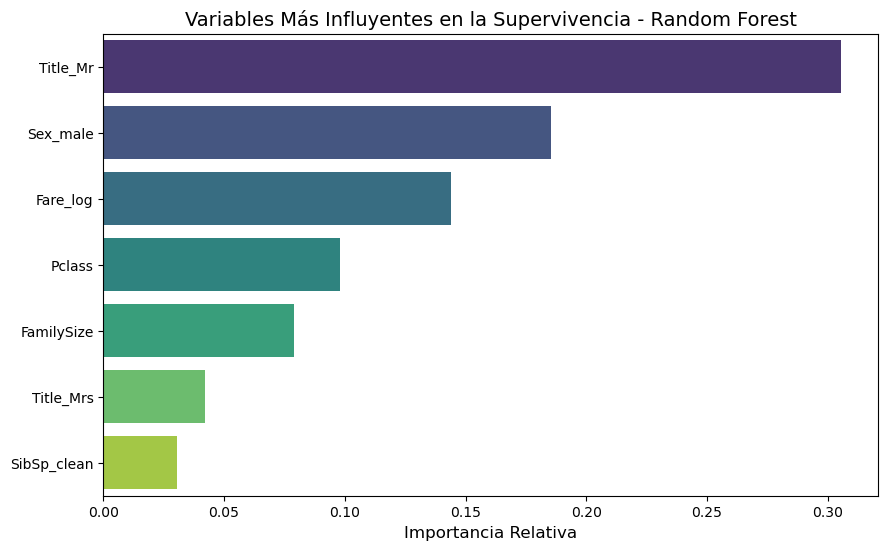

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener importancia de variables
feature_importances = pd.Series(
    grid_search_rf.best_estimator_.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# Gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_importances[:7], 
    y=feature_importances.index[:7], 
    hue=feature_importances.index[:7], 
    palette="viridis", 
    dodge=False, 
    legend=False
)
plt.title("Variables Más Influyentes en la Supervivencia - Random Forest", fontsize=14)
plt.xlabel("Importancia Relativa", fontsize=12)
plt.ylabel("")
plt.show()

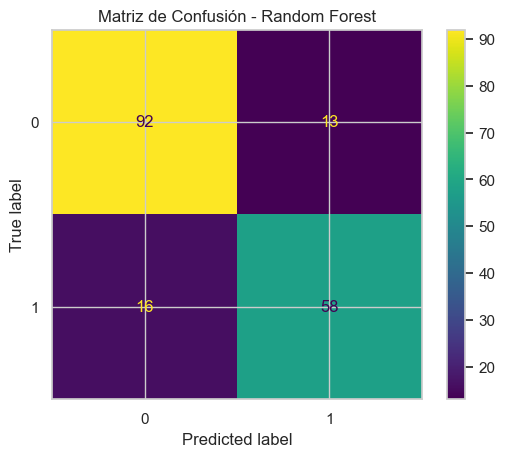

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(grid_search_rf.best_estimator_, X_val, y_val)
plt.title("Matriz de Confusión - Random Forest")
plt.show()

### **Interpretación de la Matriz de Confusión**

La matriz de confusión nos permite evaluar el desempeño del modelo en cada clase (sobrevivió vs no sobrevivió). Aquí está el desglose:

|                     | **Predicción: NO SOBREVIVIÓ (0)** | **Predicción: SOBREVIVIÓ (1)** |
|----------------------|-----------------------------------|--------------------------------|
| **Real: NO SOBREVIVIÓ (0)** | 92 (Verdaderos Negativos - TN)    | 13 (Falsos Positivos - FP)      |
| **Real: SOBREVIVIÓ (1)**    | 16 (Falsos Negativos - FN)        | 58 (Verdaderos Positivos - TP)  |

---

#### **Clave de Términos**:
- **Verdaderos Negativos (TN)**: Casos donde el modelo acertó al predecir "NO sobrevivió".  
- **Falsos Positivos (FP)**: Modelo predijo "sobrevivió" pero la realidad fue "NO sobrevivió" (**Error Tipo I**).  
- **Falsos Negativos (FN)**: Modelo predijo "NO sobrevivió" pero la realidad fue "sobrevivió" (**Error Tipo II**).  
- **Verdaderos Positivos (TP)**: Casos donde el modelo acertó al predecir "sobrevivió".

---


In [ ]:
import joblib

joblib.dump(grid_search_rf.best_estimator_, "./titanic-app/titanic_rf_model.pkl")

joblib.dump(X_train.columns.tolist(), "./titanic-app/feature_columns.pkl")
#imprimir columnas que recibe el modelo de joblib feature_columns.pkl




['./titanic-app/feature_columns.pkl']

In [32]:


# Cargar el modelo y las columnas
model = joblib.load("./titanic-app/titanic_rf_model.pkl")
feature_columns = joblib.load("./titanic-app/feature_columns.pkl")
print("Las columnas que recibe el modelo son:")
print(feature_columns)

Las columnas que recibe el modelo son:
['Pclass', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Fare_log', 'SibSp_clean', 'Parch_clean', 'FamilySize', 'IsAlone', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'AgeGroup_Adulto', 'AgeGroup_Adulto Joven', 'AgeGroup_Adulto Mayor', 'AgeGroup_Niño']
